[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import os
import glob

%matplotlib inline

### I am reading twelve csv's in the current directory from where I initiated the jupyter notebook.

Files: 
------

```
[~/Desktop/udacity/proj5]$ ls -lrt *csv
    39120422  9 Jan  2020 201908-baywheels-tripdata.csv
    40479431  9 Jan  2020 201909-baywheels-tripdata.csv
    44675257  9 Jan  2020 201910-baywheels-tripdata.csv
    34669388  9 Jan  2020 201911-baywheels-tripdata.csv
    26289897 24 Mar 19:55 201912-baywheels-tripdata.csv
    45417326 24 Mar 19:57 202001-baywheels-tripdata.csv
    63329055 24 Mar 18:59 202002-baywheels-tripdata.csv
    28323826 18 Apr 00:48 202003-baywheels-tripdata.csv
    12772882 22 May 16:50 202004-baywheels-tripdata.csv
    21784055  5 Jun 16:50 202005-baywheels-tripdata.csv
    25802599  6 Jul 00:54 202006-baywheels-tripdata.csv
    25761710 12 Aug 02:50 202007-baywheels-tripdata.csv
```
        
I am exploring last twelve month's of data collected from [baywheels](https://s3.amazonaws.com/baywheels-data/index.html) as seen above the data is available in CSV format from the [baywheels](https://s3.amazonaws.com/baywheels-data/index.html).  

From the [baywheels](https://www.lyft.com/bikes/bay-wheels/system-data) I know what each column of data represents:
```

System Data
Here you'll find Bay Wheels's trip data for public use. So whether you're a designer, developer or just plain curious, feel free to download it and bring it to life. This data is provided according to the Bay Wheels License Agreement.

The Data
Each trip is anonymized and includes:

Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
```

In [2]:
# verify the list of all the files that we are reading
all_csvs = [file for file in glob.glob(os.path.join('.', '*.csv'))]
all_csvs

['./201909-baywheels-tripdata.csv',
 './201908-baywheels-tripdata.csv',
 './202006-baywheels-tripdata.csv',
 './202001-baywheels-tripdata.csv',
 './201910-baywheels-tripdata.csv',
 './202002-baywheels-tripdata.csv',
 './202005-baywheels-tripdata.csv',
 './202004-baywheels-tripdata.csv',
 './202003-baywheels-tripdata.csv',
 './201912-baywheels-tripdata.csv',
 './201911-baywheels-tripdata.csv',
 './202007-baywheels-tripdata.csv']

In [3]:
frames = [pd.read_csv(file) for file in glob.glob(os.path.join('.', '*.csv'))]
df = pd.concat(frames, ignore_index=True)
print(f'Number of columns in the combined dataframe: {df.shape[0]}')
print(f'Number of rows in the combined dataframe: {df.shape[1]}')

/Users/simer.anand/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/simer.anand/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Number of columns in the combined dataframe: 2444694
Number of rows in the combined dataframe: 25


#### Gathering and Assessing
    - View the sample of the dataframe.
    - Check the column names
    - run info() on the dataframe to check datatype.

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,rental_access_method,is_equity
1346109,1104.0,2020-02-09 17:12:44,2020-02-09 17:31:09,NaN,NaN,37.769481,-122.430766,144.0,Precita Park,37.747300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,app,NaN
497690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,electric_bike,2020-06-26 22:06:31,2020-06-26 22:07:31,37.77,-122.4200,37.770000,-122.420000,casual,NaN,NaN
1939473,258.0,2020-03-03 19:07:13,2020-03-03 19:11:31,NaN,NaN,37.793424,-122.434624,NaN,NaN,37.800560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,app,NaN
993089,469.0,2019-10-17 11:40:10.1660,2019-10-17 11:47:59.8590,178.0,Broadway at 30th St,37.819381,-122.261928,176.0,MacArthur BART Station,37.828410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780696,689.0,2020-03-26 17:54:55.3910,2020-03-26 18:06:25.3850,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,178.0,Broadway at 30th St,37.819381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695303,494.0,2020-01-02 06:24:59.5990,2020-01-02 06:33:13.7990,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,453.0,Brannan St at 4th St,37.777934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2359913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398.0,Leavenworth St at Broadway,NaN,...,electric_bike,2020-07-09 07:39:03,2020-07-09 07:50:36,37.80,-122.4300,37.796441,-122.416842,member,NaN,NaN
315113,409.0,2019-08-18 07:06:44.1820,2019-08-18 07:13:34.1160,81.0,Berry St at 4th St,37.775880,-122.393170,345.0,Hubbell St at 16th St,37.766483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841142,516.0,2020-01-13 10:37:15,2020-01-13 10:45:51,NaN,NaN,37.788855,-122.434463,NaN,NaN,37.798311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,app,NaN
1715374,NaN,NaN,NaN,8.0,The Embarcadero at Vallejo St,NaN,NaN,8.0,The Embarcadero at Vallejo St,NaN,...,electric_bike,2020-04-01 20:19:17,2020-04-01 21:06:08,37.80,-122.3986,37.800000,-122.398600,casual,NaN,NaN


### Observations:
- There is a problem in the dataset above, columns `started_at` and `start_time` has same information
- In the last twelve months of the data I believe different columns names were used to represent the same data.
- We need to correct this, will fix this in the `Cleaning` section.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  ride_id                  object 
 15  rideable_type            object 
 16  started_at               object 
 17  ended_at                 object 
 18  start_lat                float64
 19  start_lng                float64
 20  end_lat                  float64
 21  end_lng 

#### Save the dataframe into a master file.
   - saving the dataframe into the file name `fordbike_master.csv`

In [6]:
# df.to_csv('fordbike_master.csv', index=False)

- Since we already have the dataframe in the memory, we dont need to read the master file and create a new dataframe.

#### Create a copy of the dataframe before I assess and make changes to the dataframe.
- I name the new dataframe as `ford_df`.

In [7]:
ford_df = df.copy()

#### Assessment of the dataframe `ford_df`:
- Check for the null entries and their count in the dataframe.
- Check for any duplicates in the dataframe and their count.
- Assess the different columns and their values using methods `unique(), info(), describe(), value_counts()`.

In [8]:
# check for any null rows count for each column.
ford_df.isnull().sum()

duration_sec                535645
start_time                  535645
end_time                    535645
start_station_id            701331
start_station_name          700093
start_station_latitude      535645
start_station_longitude     535645
end_station_id              709551
end_station_name            708275
end_station_latitude        535645
end_station_longitude       535645
bike_id                     535645
user_type                   535645
bike_share_for_all_trip    1592164
ride_id                    1909049
rideable_type              1909049
started_at                 1909049
ended_at                   1909049
start_lat                  1909049
start_lng                  1909049
end_lat                    1909887
end_lng                    1909887
member_casual              1909049
rental_access_method       1797745
is_equity                  2306443
dtype: int64

In [9]:
#check the number of duplicate rows
number_of_duplicate_rows = ford_df.duplicated().sum()
print(f'Number of duplicate rows: {number_of_duplicate_rows}')

# We will clean the duplicate rows in the next section of cleaning dataframe.

Number of duplicate rows: 7512


In [10]:
# Curious to know the most common bike type being used
ford_df.rideable_type.value_counts()

electric_bike    367168
docked_bike      168477
Name: rideable_type, dtype: int64

In [11]:
# Check to see if the data has any duplicate bike id
ford_df.ride_id.value_counts().nlargest(10).sort_values()

1CE7A89516B1CB69    1
682755CF7DDBE2C9    1
AF51A1925877B725    1
D507F41448E29A2A    1
8CF6D459A6465EE7    1
516E34F7C314F9D0    1
B8D7E857A0E2B49B    1
020E6FD151DB42F1    1
91B6107034A8659A    1
EECCC044F1F8AB55    1
Name: ride_id, dtype: int64

In [12]:
# Not sure what this column `is_equity` means, curious to check the values 
ford_df.is_equity.value_counts()

False    129548
True       8703
Name: is_equity, dtype: int64

In [13]:
# Find out the different number of user type casual vs member
ford_df.member_casual.value_counts()

casual    319097
member    216548
Name: member_casual, dtype: int64

In [81]:
# Find out the different number of user type subscriber vs customer
# looks like some data error, the two columns `user_type` and `member_casual` 
# are representing the same values but different terminology
ford_df.user_type.value_counts()

Subscriber    1282009
Customer       627040
Name: user_type, dtype: int64

In [14]:
# Find out the number of users in the app vs clipper
ford_df.rental_access_method.value_counts()

app        595649
clipper     51300
Name: rental_access_method, dtype: int64

#### Cleaning Data:
- started_at: the column values are in str format should be datetime obj,
- ended_at: the column values are in str format should be datetime obj,
- duplicated_rows: get rid of the duplicated rows,
- `started_at` and `start_time` two columns has the same value,
- `ended_at` and `end_time` two columns has the same value,
- create new columns which contains the `year`, `month` and `day` when the bike was hired.
- columns `member_casual` and `user_type` represents the same value, merge the values and replace one of the values with the other, for example as seen `user_type` has `Subscriber` and `Customer` values and `member_casual` has values `casual` and `member` values. They are all same. Hence for our dataframe we will user `Subscriber` and `Customer` values.

In [15]:
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,rental_access_method,is_equity
0,60863.0,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36019.0,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5615.0,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1482.0,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1272.0,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  ride_id                  object 
 15  rideable_type            object 
 16  started_at               object 
 17  ended_at                 object 
 18  start_lat                float64
 19  start_lng                float64
 20  end_lat                  float64
 21  end_lng 

In [17]:
# Convert the time related columns in the dataframe into the datetime obj
ford_df['start_time'] = pd.to_datetime(ford_df['start_time'])
ford_df['end_time'] = pd.to_datetime(ford_df['end_time'])
ford_df['started_at'] = pd.to_datetime(ford_df['started_at'])
ford_df['ended_at'] = pd.to_datetime(ford_df['ended_at'])

In [18]:
# dtype for datetime64[ns] object if reffered as '<M8[ns]'
# If below two statements do not return False, 
# that means the objects have been converted to the datetime obj

assert ford_df.start_time.dtype == '<M8[ns]'
assert ford_df.end_time.dtype == '<M8[ns]'

In [19]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  ride_id                  object        
 15  rideable_type            object        
 16  started_at               datetime64[ns]
 17  ended_at                 da

- now coming to the duplicate row of the data

In [20]:
# check out the redudant rows and what their data look like
# I will create a new subset of dataframe with only the duplicated rows.
duplicate_ford_df_rows = ford_df[ford_df.duplicated()]
duplicate_ford_df_rows

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,rental_access_method,is_equity
1839948,184.0,2020-03-01 15:59:07,2020-03-01 16:02:12,NaN,NaN,37.291022,-121.849144,NaN,NaN,37.294455,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,clipper,NaN
1839953,167.0,2020-03-01 21:03:10,2020-03-01 21:05:58,NaN,NaN,37.291145,-121.849215,NaN,NaN,37.294452,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,clipper,NaN
1839976,515.0,2020-03-01 16:18:04,2020-03-01 16:26:40,NaN,NaN,37.293233,-121.881765,NaN,NaN,37.305733,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1839987,222.0,2020-03-01 12:51:13,2020-03-01 12:54:56,NaN,NaN,37.293674,-121.851900,NaN,NaN,37.291026,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,clipper,NaN
1840021,197.0,2020-03-01 16:46:45,2020-03-01 16:50:03,NaN,NaN,37.294480,-121.852444,NaN,NaN,37.291145,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,clipper,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954095,2101.0,2020-03-01 15:34:57,2020-03-01 16:09:59,NaN,NaN,37.809066,-122.474850,NaN,NaN,37.805210,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1954096,2205.0,2020-03-01 15:36:34,2020-03-01 16:13:19,NaN,NaN,37.809074,-122.474918,NaN,NaN,37.805186,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1954097,2035.0,2020-03-01 15:36:28,2020-03-01 16:10:23,NaN,NaN,37.809100,-122.474939,NaN,NaN,37.805173,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1954100,1183.0,2020-03-01 12:26:56,2020-03-01 12:46:40,NaN,NaN,37.809138,-122.415689,NaN,NaN,37.806195,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN


From the visual assessment of the duplicated rows, It does not look like the rows are duplicate, assuming its the same bike id and all other columns with mostly `NaN` values and float values (only decimal differences) with only decimal differences.

In [21]:
# check the number of entries for each bike or see if my above assumption is true
duplicate_ford_df_rows.bike_id.value_counts().nlargest(20)

264291.0    24
370904.0    23
591582.0    22
394880.0    21
867712.0    20
478196.0    19
499847.0    19
119364.0    18
429980.0    18
462751.0    18
326439.0    17
109740.0    16
955779.0    16
629047.0    16
707170.0    16
793419.0    15
168911.0    15
528397.0    15
591670.0    15
356341.0    15
Name: bike_id, dtype: int64

- We see from above the bike id have multiple rows which makes sense bike id is associated with the bike and more than one user can use the bike.
- Lets see the details of the one of the bike from the duplicate rows dataframe.

In [22]:
duplicate_ford_df_rows.query('bike_id == 264291.0').describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_lat,start_lng,end_lat,end_lng
count,24.000000,0.0,24.000000,24.000000,0.0,24.000000,24.000000,24.0,0.0,0.0,0.0,0.0
mean,602.083333,NaN,37.769853,-122.442514,NaN,37.768956,-122.440694,264291.0,NaN,NaN,NaN,NaN
std,316.112242,NaN,0.009793,0.022932,NaN,0.011350,0.022699,0.0,NaN,NaN,NaN,NaN
min,139.000000,NaN,37.755161,-122.477611,NaN,37.740975,-122.477611,264291.0,NaN,NaN,NaN,NaN
25%,345.000000,NaN,37.762398,-122.461518,NaN,37.761585,-122.461406,264291.0,NaN,NaN,NaN,NaN
50%,599.500000,NaN,37.769631,-122.446124,NaN,37.769645,-122.440472,264291.0,NaN,NaN,NaN,NaN
75%,818.250000,NaN,37.777608,-122.419584,NaN,37.777622,-122.419548,264291.0,NaN,NaN,NaN,NaN
max,1392.000000,NaN,37.785015,-122.400398,NaN,37.784954,-122.400433,264291.0,NaN,NaN,NaN,NaN


In [23]:
duplicate_ford_df_rows.query('bike_id == 264291.0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,rental_access_method,is_equity
1865095,706.0,2020-03-01 14:01:06,2020-03-01 14:12:52,NaN,NaN,37.755161,-122.419849,NaN,NaN,37.761116,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1865731,491.0,2020-03-01 09:58:40,2020-03-01 10:06:52,NaN,NaN,37.755387,-122.419597,NaN,NaN,37.768160,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1865766,139.0,2020-03-01 09:05:28,2020-03-01 09:07:48,NaN,NaN,37.755435,-122.419536,NaN,NaN,37.761741,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1865778,839.0,2020-03-01 12:10:11,2020-03-01 12:24:11,NaN,NaN,37.755443,-122.419537,NaN,NaN,37.778524,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1871422,786.0,2020-03-01 14:20:27,2020-03-01 14:33:34,NaN,NaN,37.761116,-122.434945,NaN,NaN,37.770174,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1872571,321.0,2020-03-01 09:11:59,2020-03-01 09:17:21,NaN,NaN,37.761741,-122.419545,NaN,NaN,37.755532,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1873178,1392.0,2020-03-01 15:01:33,2020-03-01 15:24:46,NaN,NaN,37.762617,-122.466099,NaN,NaN,37.777261,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1873317,640.0,2020-03-01 08:05:58,2020-03-01 08:16:38,NaN,NaN,37.762766,-122.466253,NaN,NaN,37.772094,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1875668,559.0,2020-03-01 14:50:27,2020-03-01 14:59:47,NaN,NaN,37.764041,-122.469514,NaN,NaN,37.762617,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1879133,195.0,2020-03-01 14:46:34,2020-03-01 14:49:50,NaN,NaN,37.765477,-122.474652,NaN,NaN,37.764041,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN


- All the values in the `duration_sec` are different, hence I conclude there are no redudant / duplicate rows in the `duplicate_ford_df_rows` which is the subset of `duplicated` rows from dataframe `ford_df`.

#### Fixing the two columns with same data `started_at` and `start_time`
- update the column `start_time` with all the values in column `started_at` 
- delete the column `started_at`
- update the column `end_time` with all the values in column `ended_at` 
- delete the column `ended_at`

In [24]:
ford_df['start_time'] = ford_df['start_time'].combine_first(ford_df['started_at'])
ford_df['end_time'] = ford_df['end_time'].combine_first(ford_df['ended_at'])

In [25]:
ford_df.sample(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,rental_access_method,is_equity
1780330,678.0,2020-03-27 12:19:03.559,2020-03-27 12:30:22.406,92.0,Mission Bay Kids Park,37.772301,-122.393028,100.0,Bryant St at 15th St,37.767100,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006598,172.0,2019-10-15 18:48:44.129,2019-10-15 18:51:36.367,47.0,4th St at Harrison St,37.780955,-122.399749,64.0,5th St at Brannan St,37.776754,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189796,202.0,2020-02-13 15:57:54.420,2020-02-13 16:01:16.989,109.0,17th St at Valencia St,37.763316,-122.421904,98.0,Valencia St at 16th St,37.765052,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183635,217.0,2019-11-15 16:31:37.870,2019-11-15 16:35:15.486,47.0,4th St at Harrison St,37.780955,-122.399749,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1133090,1003.0,2020-02-27 14:02:17.812,2020-02-27 14:19:01.578,72.0,Page St at Scott St,37.772406,-122.435650,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863590,983.0,2020-03-05 08:44:52.000,2020-03-05 09:01:16.000,134.0,Valencia St at 24th St,37.752428,-122.420628,NaN,NaN,37.790280,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
1493171,705.0,2020-02-19 14:39:06.000,2020-02-19 14:50:51.000,NaN,NaN,37.790342,-122.392551,NaN,NaN,37.782271,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,app,NaN
706813,225.0,2020-01-23 17:15:52.000,2020-01-23 17:19:38.000,NaN,NaN,37.335340,-121.892509,NaN,NaN,37.341302,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,clipper,NaN
78322,547.0,2019-09-20 09:36:22.695,2019-09-20 09:45:30.447,66.0,3rd St at Townsend St,37.778742,-122.392741,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Now we create the columns to contain the `year`, `month` and `day` values when the bike was hired.

In [26]:
ford_df['year'] = ford_df['start_time'].dt.strftime('%Y')
ford_df['month'] = ford_df['start_time'].dt.strftime('%m')
ford_df['day'] = ford_df['start_time'].dt.strftime('%d')
ford_df['month_year'] = ford_df['start_time'].dt.strftime('%Y-%m')
ford_df['hour'] = ford_df['start_time'].dt.strftime('%H')

- Now we have five formats of date representation into the dataframe, why not just one more column with the day of the week when the bike was hired. 

In [52]:
ford_df['day_of_week'] = ford_df['start_time'].dt.strftime('%a')

In [67]:
ford_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_casual,rental_access_method,is_equity,year,month,day,month-year,dd-mm-yy,day_of_week,hour
2340504,NaN,2020-07-18 06:06:33.000,2020-07-18 06:13:24.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,casual,NaN,NaN,2020,07,18,2020-07,18 07 2020,Sat,06
252872,1081.0,2019-08-27 07:40:32.307,2019-08-27 07:58:33.370,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,NaN,NaN,NaN,2019,08,27,2019-08,27 08 2019,Tue,07
377852,262.0,2019-08-08 17:46:01.628,2019-08-08 17:50:23.982,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,NaN,NaN,NaN,2019,08,08,2019-08,08 08 2019,Thu,17
2413168,NaN,2020-07-13 18:07:39.000,2020-07-13 18:07:51.000,77.0,11th St at Natoma St,NaN,NaN,77.0,11th St at Natoma St,NaN,...,member,NaN,NaN,2020,07,13,2020-07,13 07 2020,Mon,18
1371785,744.0,2020-02-03 15:11:24.000,2020-02-03 15:23:49.000,77.0,11th St at Natoma St,37.773507,-122.416040,NaN,NaN,37.788143,...,NaN,app,NaN,2020,02,03,2020-02,03 02 2020,Mon,15
1793444,1222.0,2020-03-12 18:33:04.786,2020-03-12 18:53:27.304,145.0,29th St at Church St,37.743684,-122.426806,145.0,29th St at Church St,37.743684,...,NaN,NaN,NaN,2020,03,12,2020-03,12 03 2020,Thu,18
1249410,234.0,2020-02-11 16:19:50.000,2020-02-11 16:23:45.000,NaN,NaN,37.334670,-121.891292,NaN,NaN,37.337876,...,NaN,clipper,NaN,2020,02,11,2020-02,11 02 2020,Tue,16
2436994,NaN,2020-07-17 19:06:13.000,2020-07-17 19:32:29.000,153.0,59th St at Horton St,NaN,NaN,211.0,Broadway at 40th St,NaN,...,member,NaN,NaN,2020,07,17,2020-07,17 07 2020,Fri,19
1409768,635.0,2020-02-22 19:56:39.000,2020-02-22 20:07:14.000,NaN,NaN,37.777578,-122.399913,NaN,NaN,37.788919,...,NaN,app,NaN,2020,02,22,2020-02,22 02 2020,Sat,19
1283403,576.0,2020-02-11 16:05:28.000,2020-02-11 16:15:04.000,NaN,NaN,37.755400,-122.419532,NaN,NaN,37.761031,...,NaN,app,NaN,2020,02,11,2020-02,11 02 2020,Tue,16


the values for each of above column looks correct.

#### Fixing the redudant columns `user_type` and `member_causal`
- replace the `member` with `Subscriber` string
- replace the `casual` with `Customer` string
- merge the two columns into one.

In [83]:
ford_df['member_casual'] = ford_df['member_casual'].replace('member', 'Subscriber')
ford_df['member_casual'] = ford_df['member_casual'].replace('casual', 'Customer')

- Now that we have replaced the strings in the column `member_casual`, next we merge it to the `user_type` column.

In [85]:
# Listing the number of the values before we merged so that we verfiy the Summation later
ford_df['member_casual'].value_counts()

Customer      319097
Subscriber    216548
Name: member_casual, dtype: int64

In [86]:
# Listing the number of the values before we merged so that we verfiy the Summation later
ford_df['user_type'].value_counts()

Subscriber    1282009
Customer       627040
Name: user_type, dtype: int64

In [87]:
ford_df['user_type'] = ford_df['user_type'].combine_first(ford_df['member_casual'])

In [88]:
# Verify the total number of the Subcriber and Customer values are total of values from both the columns.
ford_df['user_type'].value_counts()

Subscriber    1498557
Customer       946137
Name: user_type, dtype: int64

In [91]:
# Verify that the columns have been merged.
ford_df[['user_type', 'member_casual']].sample(10)

,user_type,member_casual
209814,Subscriber,NaN
1673356,Customer,Customer
1997787,Customer,NaN
625701,Customer,NaN
1585844,Subscriber,Subscriber
2209940,Subscriber,NaN
787663,Subscriber,NaN
814222,Subscriber,NaN
2325905,Customer,Customer
1981278,Subscriber,NaN


### Structure of the data?
- 13 months of data from ford sharing bike app.
- the data has all the columns as mentioned.
- added columns `date`, `month` and `year` that contains the values when the bike was hired.
- changed the `start_time` and `end_time` to the date object


In [28]:
# Originally there were approx. 186,3719 bike rides that happen from Jan -Dec 2018. The dataset contained features about:

# a) trip duration: start_time,end_time, how long the trip took in seconds

# b) stations: start and end station id, name, geolocation (latitude/longitude)

# c) customer data: gender, birth date and user type

# d) rented bikes: bike id

# The dataset was further added few columns to find interesting analysis:

# e) Bike time: month, day, hour of the day, weekday (both for start and end date)

# f) customer: age

# Verify and update the answers
#### What is/are the main feature(s) of interest in your dataset?
I'm interested to see at what time bikes are high in demand (during the day/weekday/month). Secondly, which age customers and gender(Male/Female) uses the service mostly. Finally,the service is mostly used by members or casual riders.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
From dataset, I expect the start time will be mostly used in my analysis along with customer related data like age,gender. I expect that bike time like hour,day,weekday,month will have the strongest effect on bike demand.

### Univariate Visualisation:

#### 1. Number of Bike Hires or Rides on monthly basis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

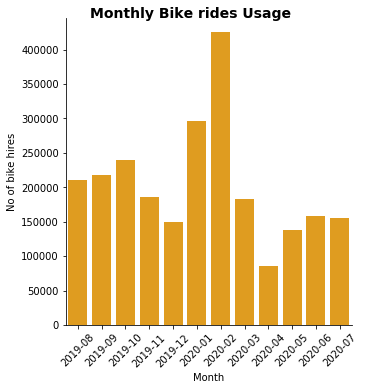

In [37]:
graph = sb.catplot(data=ford_df.sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)

### Observation (Covid-19 Impact):
Covid-19 did impact the bike hires, look at the stat from `March` and then `April` (its all time low in 12 months of data)

#### 2. Number of Bike Hires or Rides on weekly basis.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

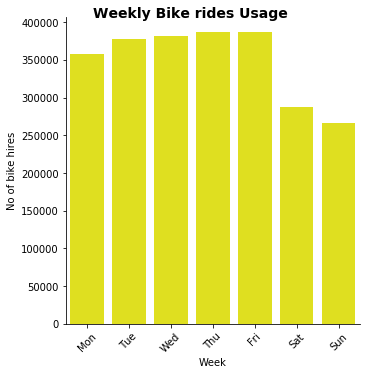

In [56]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=ford_df, x='day_of_week', kind='count', color='yellow', order=weekday)
graph.set_axis_labels("Week", "No of bike hires")
graph.fig.suptitle('Weekly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)

### Observation :
- Weekdays are generally more busy than the weekends.
- `Friday` is 15-20% busier than `Sunday`

#### 3. Number of Bike Hires or Rides on date basis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

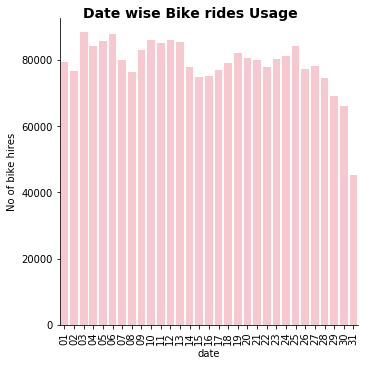

In [62]:
graph = sb.catplot(data=ford_df, x='day', kind='count', color='pink')
graph.set_axis_labels("date", "No of bike hires")
graph.fig.suptitle('Date wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

### Observation :
- Did not find anything interesting,
- 31st date is bound to have less hire count since the date only comes in 6/12 months.

#### 4. Number of Bike Hires or Rides on hourly basis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

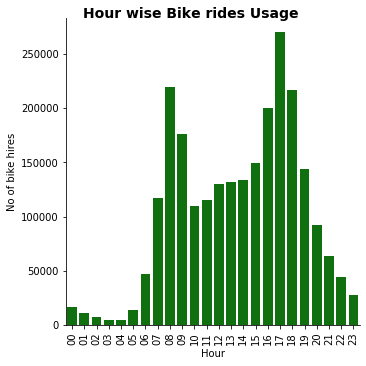

In [68]:
graph = sb.catplot(data=ford_df, x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

### Observation :
- Peak hire is around the start and end of the business hour.

### Bivariate Visualisation:

#### 1. Proportion of the riders using either of `App` or `Clipper` method to hire the bike.

In [93]:
# fig = px.pie(ford_df, values='bike_id', names='rental_access_method', 
#              title='Proportion of the Users Access Methods')
# fig.show()

### Observation:
- `App` is obviously the most popular access method to hire the bike,
- `92.1%` of people using the App and `7.9%` riders using the `Clipper`.

In [ ]:
fig = px.pie(ford_df, values='bike_id', names='rental_access_method', 
             title='Proportion of the Users Access Methods')
fig.show()

In [80]:
ford_df[['member_casual', 'user_type']].sample(100)

,member_casual,user_type
1209249,NaN,Customer
1175267,NaN,Customer
1644198,member,NaN
456650,casual,NaN
1505738,NaN,Subscriber
...,...,...
1032876,NaN,Subscriber
1106536,NaN,Customer
1368319,NaN,Customer
1076397,NaN,Subscriber
